# Demonstration of equation structure matrix visualization

In [1]:
from graph.matrixview import render_incidence
from graph.operators import eqv_to_edges_tree
from graph.graphutils import VAR, COMP, SOLVER, namefromid

In [2]:
incidence_structure = {
    'f_0': ('x','y'),   
    'f_1': ('a','c','y'),   # analysis f1(c, y)
    'f_2': ('a','b'),       # analysis f2(a)
    'r_1': ('b','d'),       # function 
    'f_3': ('e','c', 'b')
         }
solvefor = {
    'f_0': 'y',     # should not be c, given that solvefor for r1 is c
    'f_1': 'a',
    'f_2': 'b',
    'f_3': 'e',     # should not be c, given that solvefor for r1 is c
}
Vtree = {
    'c': 2      #(? when not assigned) # for 'diagonalized' DSM should be 'd'
    # note also that 'c' has to be an input upstream of 'r1', but if r1 is under a solver, then 'c' can not be an output of any node outside
}

In [3]:
edges, tree, _ = eqv_to_edges_tree(incidence_structure, output_set=solvefor, offset=False)

In [4]:
for elt in ['f_1', 'f_2', 'r_1']:
    tree[0][elt] = 2
tree = (tree[0], {2:1}, Vtree)

In [5]:
nodetyperepr = {VAR: '{}', COMP: '{}', SOLVER: '{}'}
namingfunc = namefromid(nodetyperepr)

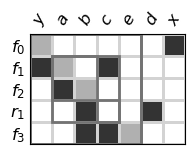

In [6]:
render_incidence(edges, tree, rawvarname=True, namingfunc=namingfunc, indentsolver=False, hideticks=True, figsize=(2,2), fontsize=12, patchwidth=2);